In [ ]:
## Package
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from scipy.io import loadmat
from tkinter import filedialog
from scipy.signal import  hilbert
from FreqAnalysisModule import FreqAnalysis
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
from Fillter_us import FIR_us
init_notebook_mode(connected=True)



In [2]:
## Load .mat file from dir.

root = tk.Tk()
root.withdraw()  

root.attributes('-topmost', True)

file_path = filedialog.askopenfilename(
    title="Select a file",
    filetypes=[ ("MATLAB files", "*.mat")],
    parent=root 
)

dataset = loadmat(file_path)
dataset = dataset['dataset']

c:\Users\IHKim\anaconda3\envs\advenced_medical_imaging_project\Lib\site-packages\scipy\io\matlab\_mio.py:227: MatReadWarning:

Duplicate variable name "None" in stream - replacing previous with new
Considerscipy.io.matlab._mio5.varmats_from_mat to split file into single variable files



In [3]:
## Parameter setting
c = 1540                      # Sound Velocity     [m/sec]
N = len(dataset)                # Number of Sample   [index]
N2 = round(N/2)
activeNum = dataset.shape[1]    # Number of Active Ch. [index]
sclNum = dataset.shape[2]       # Number of Scan Line  [index]
fs = 1e9                        # Sampling Frequecny [Hz]
f0 = 60e6                       # Center Frequecny   [Hz]
pitch = 20e-6                   # Pitch size         [m]
unitDepth = c/fs/2              
f_vec = (np.array(range(1,N2+1)) * fs/(2*N2)-1)/1e6  
dist_vec = np.array(range(0,N)) * unitDepth          # [m] 


In [ ]:
## Original Signal's Frequency Analysis
# FreqAnalysis(dataset, fs, N, N2, sclNum)z/
# Filter Design
numtaps = 129
lowcut =45e6
highcut = 120e6

filtered_dataset = FIR_us(dataset, numtaps=numtaps,fs=fs,
                          lowcut=lowcut, highcut=highcut)


In [ ]:
##  Delay & Summation(DAS)
# Summation
summation_data= np.squeeze(np.sum(Beamforming_data,1))

In [ ]:
## Envelop detection
hilbert_data = np.abs(hilbert(summation_data))

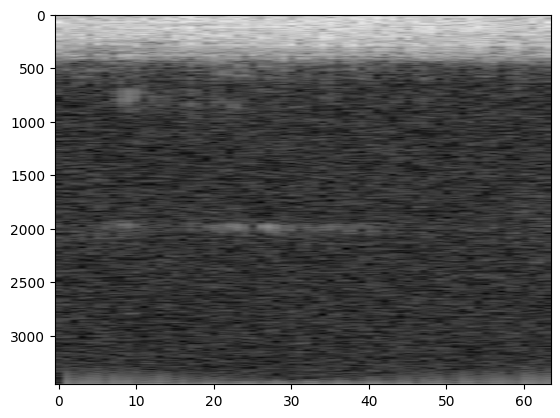

In [ ]:
## Log Compression
DR = 60
logComp = np.zeros_like(hilbert_data)
maxValue = np.max(np.max(hilbert_data))

ymax = 2**8-1
logComp = ymax*((20/DR)*np.log10(hilbert_data/maxValue)+1)
logComp[logComp<0] = 0

In [ ]:
## Digital scan convertor(DSC)
plt.figure(3)
plt.imshow(logComp, cmap='gray', aspect='auto')

np.float64(0.0)